In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_4378.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_747.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_561.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_345.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3019.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_2566.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3156.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3889.jpg
/kaggle/input/human-action-recognition-har-dataset

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

2025-10-03 11:38:44.911559: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759491525.202258      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759491525.290882      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
df = pd.read_csv('/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv')
df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [5]:
df.columns

Index(['filename', 'label'], dtype='object')

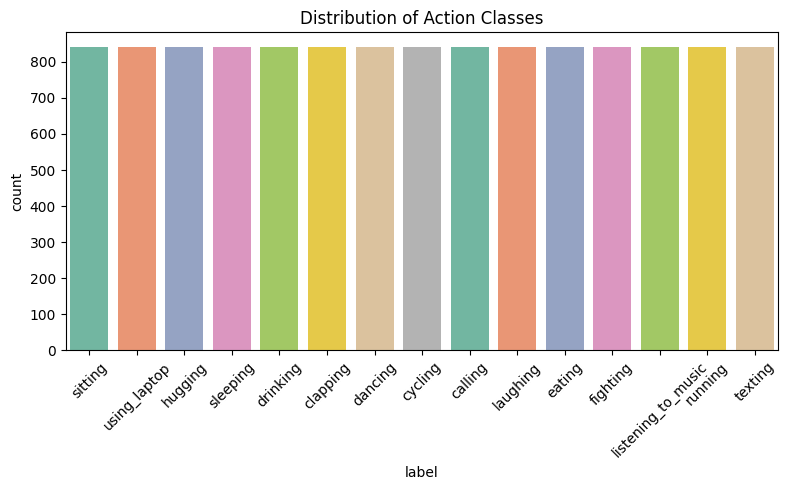

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Distribution of Action Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
IMG_DIR = '/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train'
IMG_SIZE = (64, 64)

images, labels = [], []

for i, row in df.iterrows():
    path = os.path.join(IMG_DIR, row['filename'])
    img = load_img(path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    images.append(img_array)
    labels.append(row['label'])

In [8]:
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
y_cat = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(images, y_cat, test_size=0.2, random_state=42)
X_train, X_test = tf.convert_to_tensor(X_train), tf.convert_to_tensor(X_test)

2025-10-03 11:40:32.370260: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,087 (6.21 MB)

 Trainable params: 1,627,087 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 25s 90ms/step - accuracy: 0.1062 - loss: 2.6885 - val_accuracy: 0.2178 - val_loss: 2.3995
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.2657 - loss: 2.2495 - val_accuracy: 0.2634 - val_loss: 2.2396
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.3630 - loss: 1.9692 - val_accuracy: 0.3026 - val_loss: 2.1514
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.4626 - loss: 1.6980 - val_accuracy: 0.3095 - val_loss: 2.2396
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.5728 - loss: 1.3394 - val_accuracy: 0.3234 - val_loss: 2.2824
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7175 - loss: 0.9391 - val_accuracy: 0.3100 - val_loss: 2.6350
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.8343 - loss: 0.5815 - val_accuracy: 0.2817 - val_loss: 2.9997
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.9111 - loss: 0.3364 - 

In [11]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2908 - loss: 4.6525
Test Accuracy: 0.30
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
                    precision    recall  f1-score   support

           calling       0.15      0.13      0.14       173
          clapping       0.22      0.30      0.25       160
           cycling       0.55      0.54      0.54       186
           dancing       0.38      0.33      0.35       180
          drinking       0.19      0.20      0.20       152
            eating       0.48      0.50      0.49       151
          fighting       0.39      0.37      0.38       186
           hugging       0.17      0.26      0.21       151
          laughing       0.26      0.27      0.27       179
listening_to_music       0.24      0.23      0.24       176
           running       0.36      0.37      0.37       155
           sitting       0.24      0.21      0.22       163
          sleeping       0.35      0.37      0.36       162
           texting       

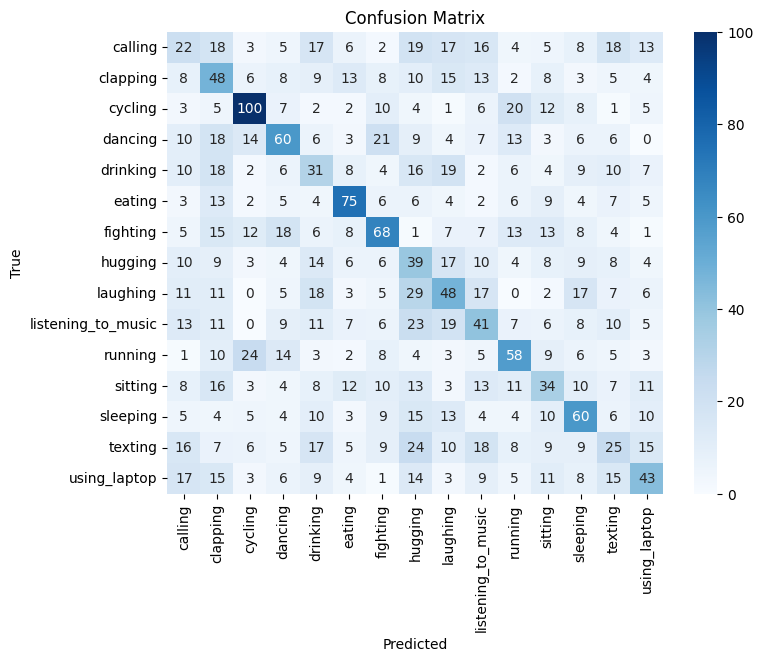

In [12]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

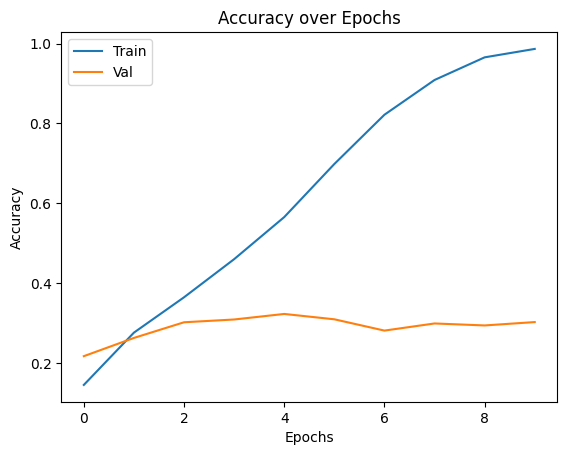

In [13]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()